In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## Data Preparation

In [72]:
tickers = [
    "NFLX", "ADBE", "CRM", "INTC", "AMD", "QCOM", "CSCO",
    "JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "V", "MA", "PYPL",
    "JNJ", "PFE", "MRK", "ABT", "UNH", "CVS", "LLY", "BIIB", "MRNA",
    "KO", "PEP", "PG", "WMT", "AMZN", "NKE", "MCD", "SBUX", "TSLA",
    "HD", "CAT", "MMM", "BA", "GE", "UPS", "JCI"
]
dataset = yf.download(tickers=tickers,interval='1mo')['Adj Close']    
dataset

[*********************100%%**********************]  42 of 42 completed


Ticker,ABT,ADBE,AMD,AMZN,AXP,BA,BAC,BIIB,C,CAT,...,PG,PYPL,QCOM,SBUX,TSLA,UNH,UPS,V,WFC,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1962-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,104.890572,462.829987,158.380005,175.000000,232.614288,167.839996,36.786259,214.820007,60.222351,332.002747,...,161.183548,67.919998,165.173096,87.296082,183.279999,481.656677,144.022629,267.577209,58.533756,58.977165
2024-05-01,101.650719,444.760010,166.899994,176.440002,239.287262,177.610001,39.748249,224.940002,61.184650,337.146942,...,163.556305,62.990002,203.217194,79.137665,178.080002,493.277374,135.673080,271.412445,59.125801,65.346901
2024-06-01,103.361641,555.539978,162.210007,193.250000,230.862366,182.009995,39.529575,231.820007,62.855206,331.748932,...,163.934036,58.029999,199.179993,77.382309,197.880005,507.108704,135.129486,261.944733,58.939735,67.517548


In [73]:
dataset.dropna(inplace=True)   #Dropping dates with NaN values
dataset.to_period('M')

Ticker,ABT,ADBE,AMD,AMZN,AXP,BA,BAC,BIIB,C,CAT,...,PG,PYPL,QCOM,SBUX,TSLA,UNH,UPS,V,WFC,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,66.105255,247.820007,24.410000,85.936501,94.737297,374.705750,24.879889,333.779999,52.252148,116.445290,...,83.424126,88.760002,43.190144,60.480232,20.468000,248.705795,86.732826,129.739838,41.400623,29.111807
2019-02,70.634186,262.500000,23.530001,81.991501,99.793304,427.507751,25.412968,328.010010,51.863045,120.873222,...,85.896873,98.070000,46.565460,62.361912,21.325333,222.951584,90.682724,142.338120,42.612988,30.071770
2019-03,72.745369,266.489990,25.520000,89.037498,101.238274,372.486603,24.233955,236.380005,50.790947,119.245056,...,90.690735,103.839996,49.740177,66.327644,18.657333,227.590591,92.756866,150.355057,41.271988,29.628241
2019-04,72.399574,289.250000,27.629999,96.325996,108.583351,368.843872,26.860250,229.240005,57.713268,122.703827,...,92.808731,112.769997,75.993980,69.307648,15.912667,215.348267,88.174637,158.287247,41.348854,31.409445
2019-05,69.561798,270.899994,27.410000,88.753502,106.625359,333.608917,23.364380,219.289993,50.733807,106.084190,...,90.330299,109.750000,58.956451,67.862236,12.344000,223.414474,77.134140,155.303024,37.898129,30.981859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04,104.890572,462.829987,158.380005,175.000000,232.614288,167.839996,36.786259,214.820007,60.222351,332.002747,...,161.183548,67.919998,165.173096,87.296082,183.279999,481.656677,144.022629,267.577209,58.533756,58.977165
2024-05,101.650719,444.760010,166.899994,176.440002,239.287262,177.610001,39.748249,224.940002,61.184650,337.146942,...,163.556305,62.990002,203.217194,79.137665,178.080002,493.277374,135.673080,271.412445,59.125801,65.346901
2024-06,103.361641,555.539978,162.210007,193.250000,230.862366,182.009995,39.529575,231.820007,62.855206,331.748932,...,163.934036,58.029999,199.179993,77.382309,197.880005,507.108704,135.129486,261.944733,58.939735,67.517548


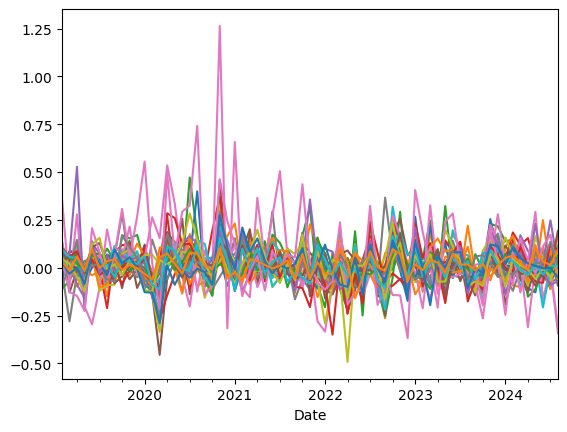

In [74]:
return_series = dataset.pct_change().dropna()
return_series.plot()
plt.legend([], frameon=False)

In [75]:
corr_matrix = return_series.corr()
corr_matrix

Ticker,ABT,ADBE,AMD,AMZN,AXP,BA,BAC,BIIB,C,CAT,...,PG,PYPL,QCOM,SBUX,TSLA,UNH,UPS,V,WFC,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
ABT,1.000000,0.391506,0.401742,0.358404,0.333615,0.172327,0.396873,0.062855,0.292643,0.388917,...,0.511605,0.444913,0.342875,0.555051,0.308416,0.349412,0.475941,0.420992,0.227214,0.385994
ADBE,0.391506,1.000000,0.525310,0.570576,0.351902,0.437263,0.381512,-0.011585,0.407780,0.344075,...,0.279307,0.414739,0.432548,0.356788,0.433276,0.221097,0.393919,0.498421,0.246929,0.254351
AMD,0.401742,0.525310,1.000000,0.605684,0.318499,0.200459,0.298079,-0.002226,0.308779,0.197607,...,0.173137,0.239572,0.568358,0.352254,0.425346,0.120990,0.426337,0.274332,0.199223,0.182667
AMZN,0.358404,0.570576,0.605684,1.000000,0.345079,0.184144,0.309551,-0.051651,0.322937,0.200174,...,0.066483,0.487766,0.514131,0.325395,0.600935,0.161479,0.410646,0.365656,0.210608,0.298933
AXP,0.333615,0.351902,0.318499,0.345079,1.000000,0.638828,0.734471,-0.116524,0.757661,0.515655,...,0.217833,0.481075,0.388327,0.430511,0.375770,0.218206,0.377725,0.768508,0.798695,0.277290
BA,0.172327,0.437263,0.200459,0.184144,0.638828,1.000000,0.547477,-0.083409,0.634517,0.443760,...,0.231750,0.317601,0.343964,0.385009,0.266457,0.121596,0.378577,0.518901,0.579819,0.162879
BAC,0.396873,0.381512,0.298079,0.309551,0.734471,0.547477,1.000000,0.041871,0.864172,0.651373,...,0.227380,0.486512,0.481393,0.418487,0.336766,0.382210,0.433632,0.540821,0.855346,0.256159
BIIB,0.062855,-0.011585,-0.002226,-0.051651,-0.116524,-0.083409,0.041871,1.000000,-0.059914,0.064304,...,-0.177529,0.058208,-0.040701,-0.035205,0.083574,0.058397,-0.063732,-0.065313,-0.019385,0.095432
C,0.292643,0.407780,0.308779,0.322937,0.757661,0.634517,0.864172,-0.059914,1.000000,0.562228,...,0.193767,0.500911,0.501274,0.426323,0.316493,0.243745,0.315641,0.560721,0.798619,0.149958


<Axes: xlabel='Ticker', ylabel='Ticker'>

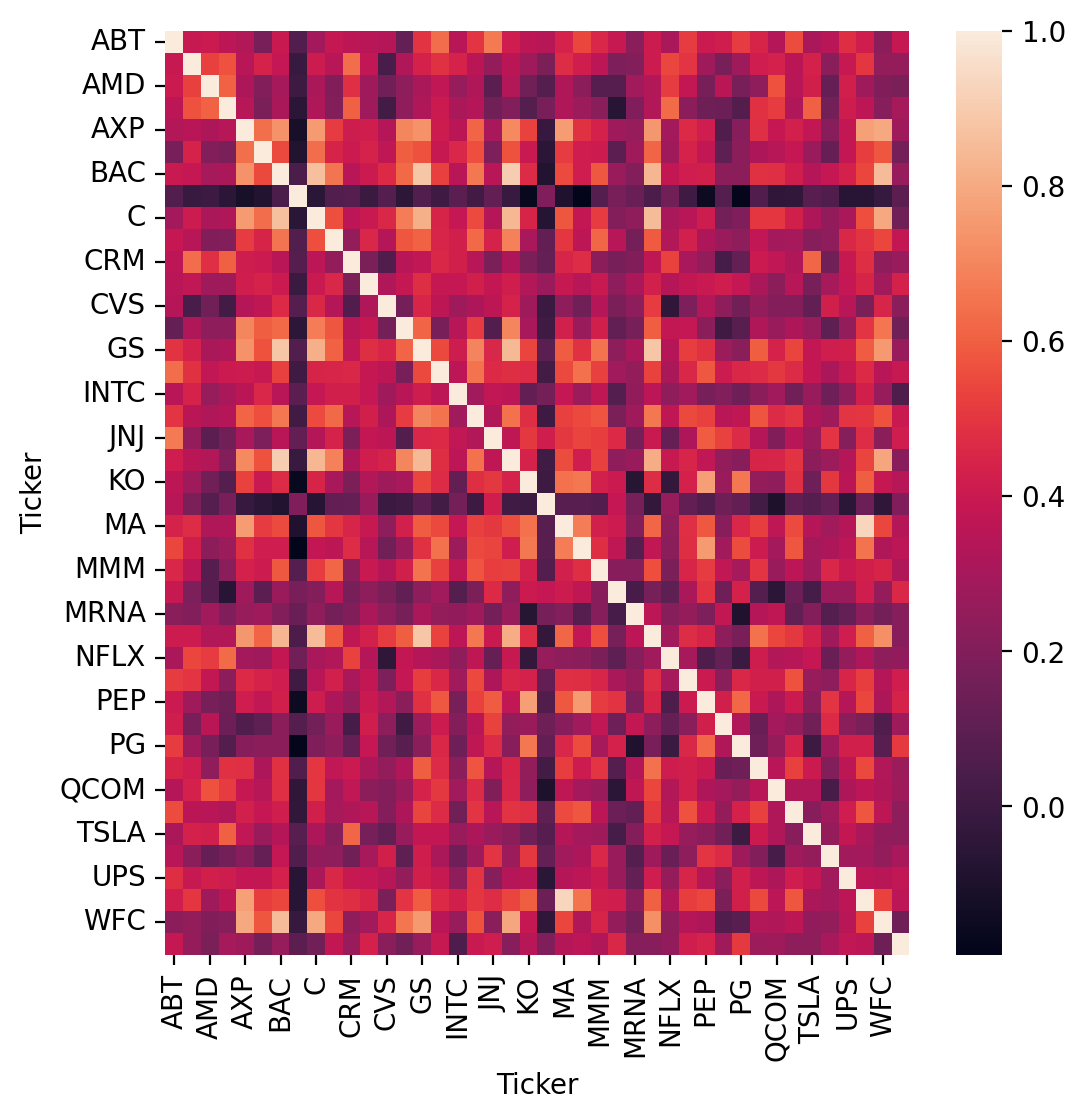

In [76]:
plt.figure(figsize=(6,6),dpi=200)
sns.heatmap(corr_matrix)

## Finding pairs with high correlation value

In [77]:
result = corr_matrix[(abs(corr_matrix) > 0.9) & (corr_matrix != 1)]

row_indices, col_indices = np.where(result > 0.9)

# Get row and column names
row_names = corr_matrix.index[row_indices]
col_names = corr_matrix.columns[col_indices]

# Print the results
for i, j, row_name, col_name in zip(row_indices, col_indices, row_names, col_names):
    print(f"Corr_value {result.iloc[i, j]} : {row_name} and {col_name}")

Corr_value 0.902386342624179 : BAC and JPM
Corr_value 0.902386342624179 : JPM and BAC
Corr_value 0.9345985331122472 : MA and V
Corr_value 0.9345985331122472 : V and MA


Text(0, 0.5, 'Returns')

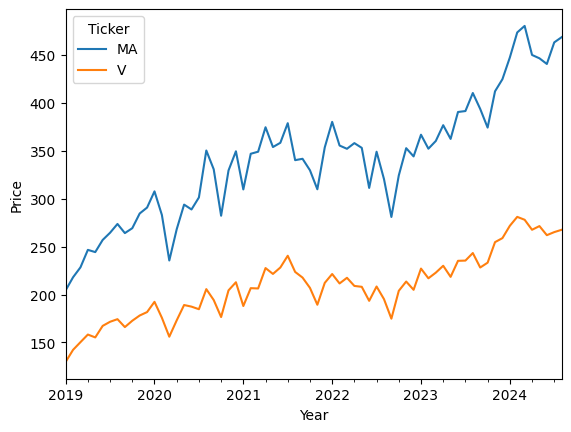

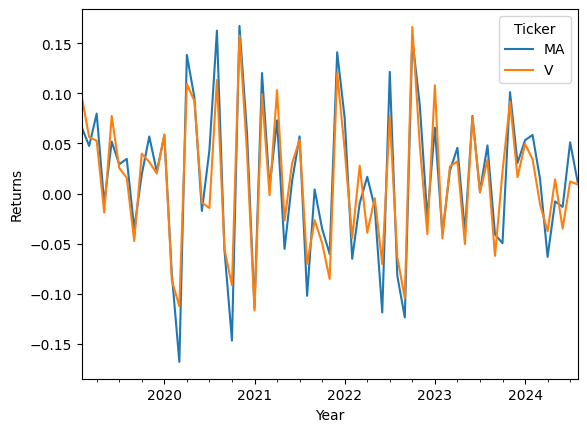

In [78]:
# Stocks to analyse further
Stock1 = 'MA'
Stock2 = 'V'


dataset[[Stock1,Stock2]].plot()
plt.xlabel('Year')
plt.ylabel('Price')

return_series[[Stock1,Stock2]].plot()
plt.xlabel('Year')
plt.ylabel('Returns')

Text(0.5, 0, 'Year')

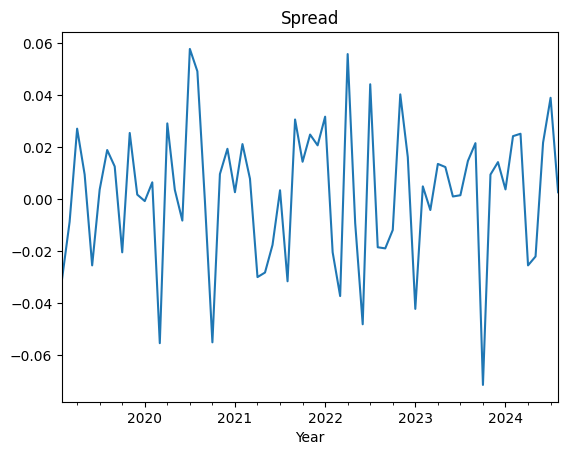

In [79]:
spread = return_series[Stock1] - return_series[Stock2]
spread.plot()
plt.title('Spread')
plt.xlabel('Year')

## Augmented Engel-Granger two step cointegration test

In [80]:
import statsmodels.tsa.stattools as ts

coint_result = ts.coint(return_series[Stock1],return_series[Stock2])
coint_result

(-8.158959157123038,
 1.2023582783730123e-11,
 array([-4.07007462, -3.43027362, -3.10933503]))

In [81]:
p_val = coint_result[1]

if p_val < 0.05:
    print(f"Test 1 passed. P-value : {p_val}")
else:
    print(f"Test 1 failed. P-value : {p_val}")

Test 1 passed. P-value : 1.2023582783730123e-11


In [82]:
# Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

stock1_adf = adfuller(dataset[Stock1])
print(f"P-value for adf test on Stock1: {stock1_adf[1]}")

stock1_adf = adfuller(dataset[Stock2])
print(f"P-value for adf test on Stock2: {stock1_adf[1]}")

spread_adf = adfuller(spread)
print(f"P-value for adf test on Spread: {spread_adf[1]}")                       # Time series for spread is stationary

ratio_adf = adfuller(return_series[Stock1]/return_series[Stock2])
print(f"P-value for adf test on Ratio: {ratio_adf[1]}")   

if spread_adf[1] < 0.05:
    print("ADF test passed.")
else:
    print("ADF test failed.")    

P-value for adf test on Stock1: 0.7732161503390915
P-value for adf test on Stock2: 0.6685849734550059
P-value for adf test on Spread: 1.706446236870601e-13
P-value for adf test on Ratio: 1.0236179390254563e-09
ADF test passed.


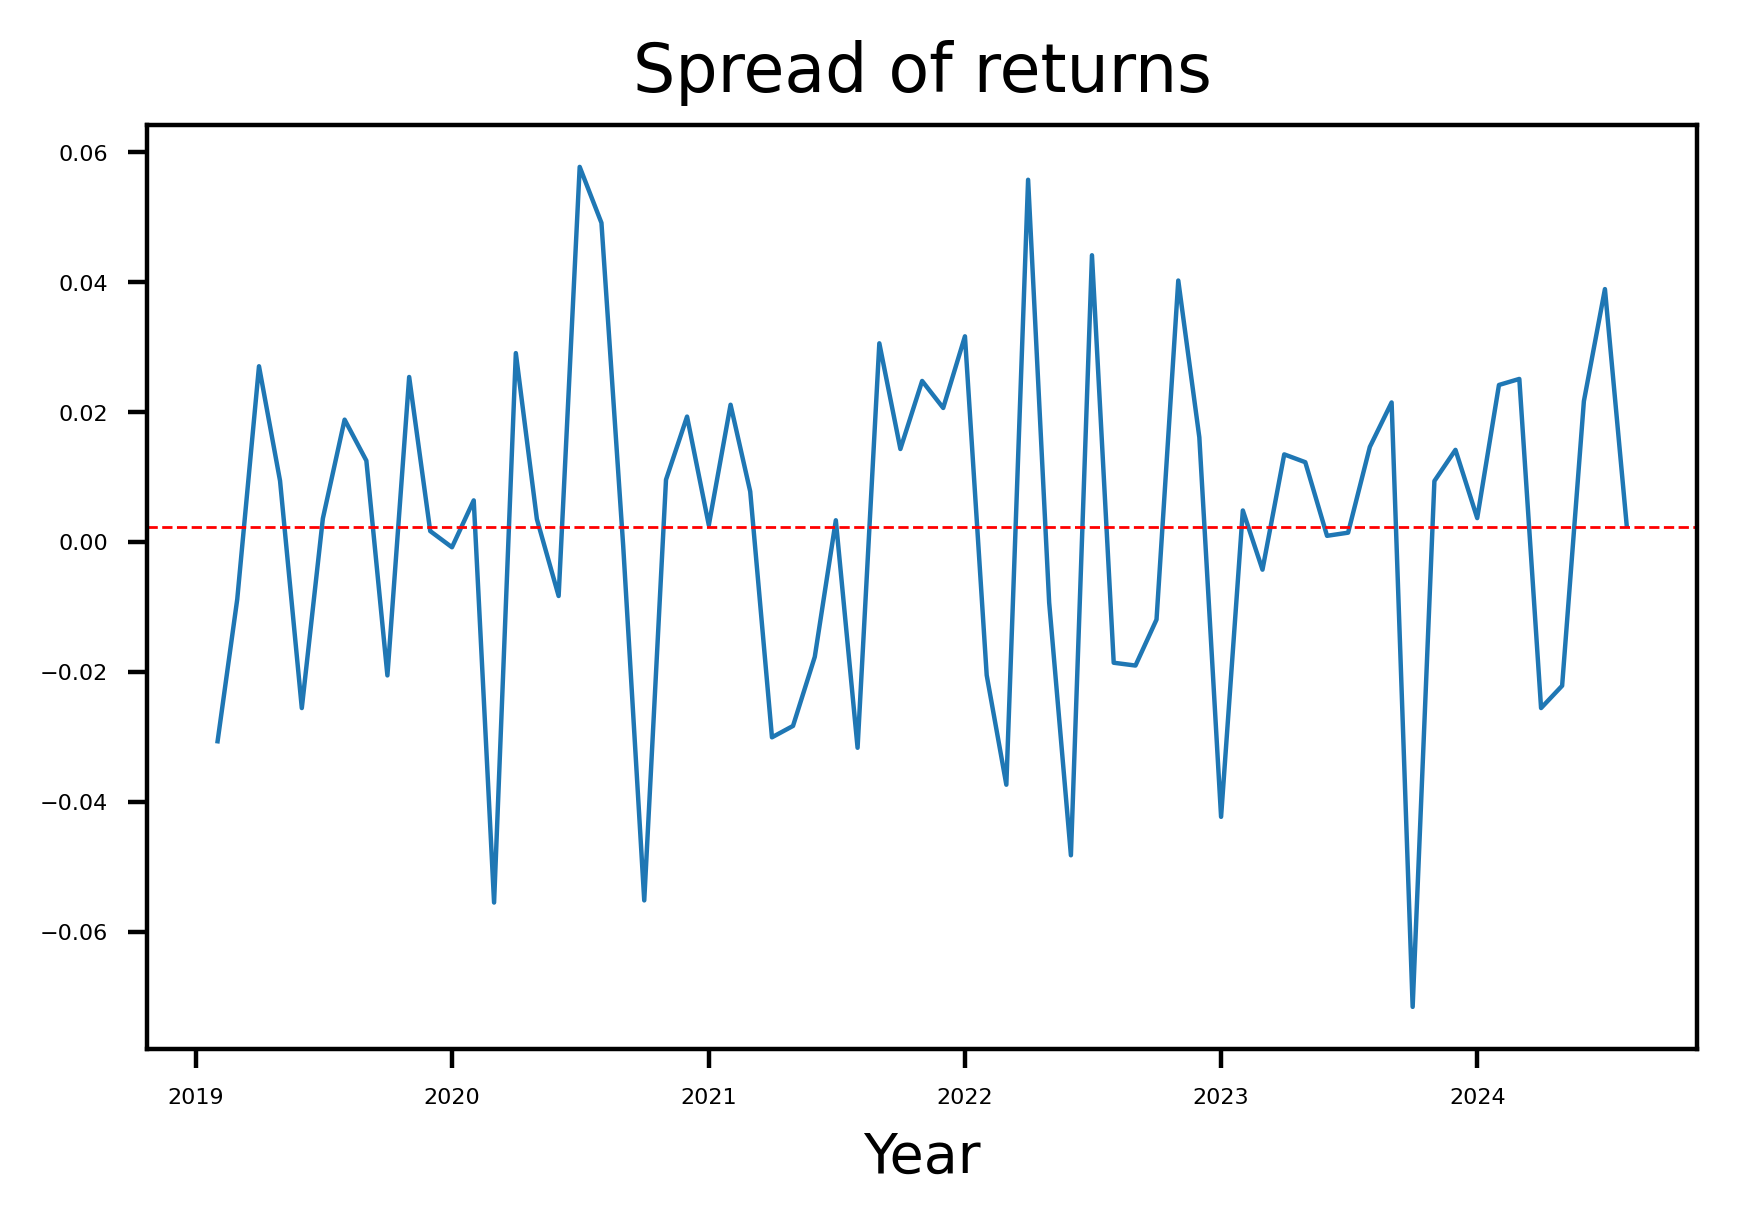

In [83]:
plt.figure(figsize=(5,3),dpi=400)

plt.plot(spread, label="Spread",lw=0.8)
plt.axhline(spread.mean(),color='red',linestyle="dashed",lw=0.5)
plt.title("Spread of returns")
plt.xlabel('Year')
plt.tick_params(axis='both' ,labelsize=4)

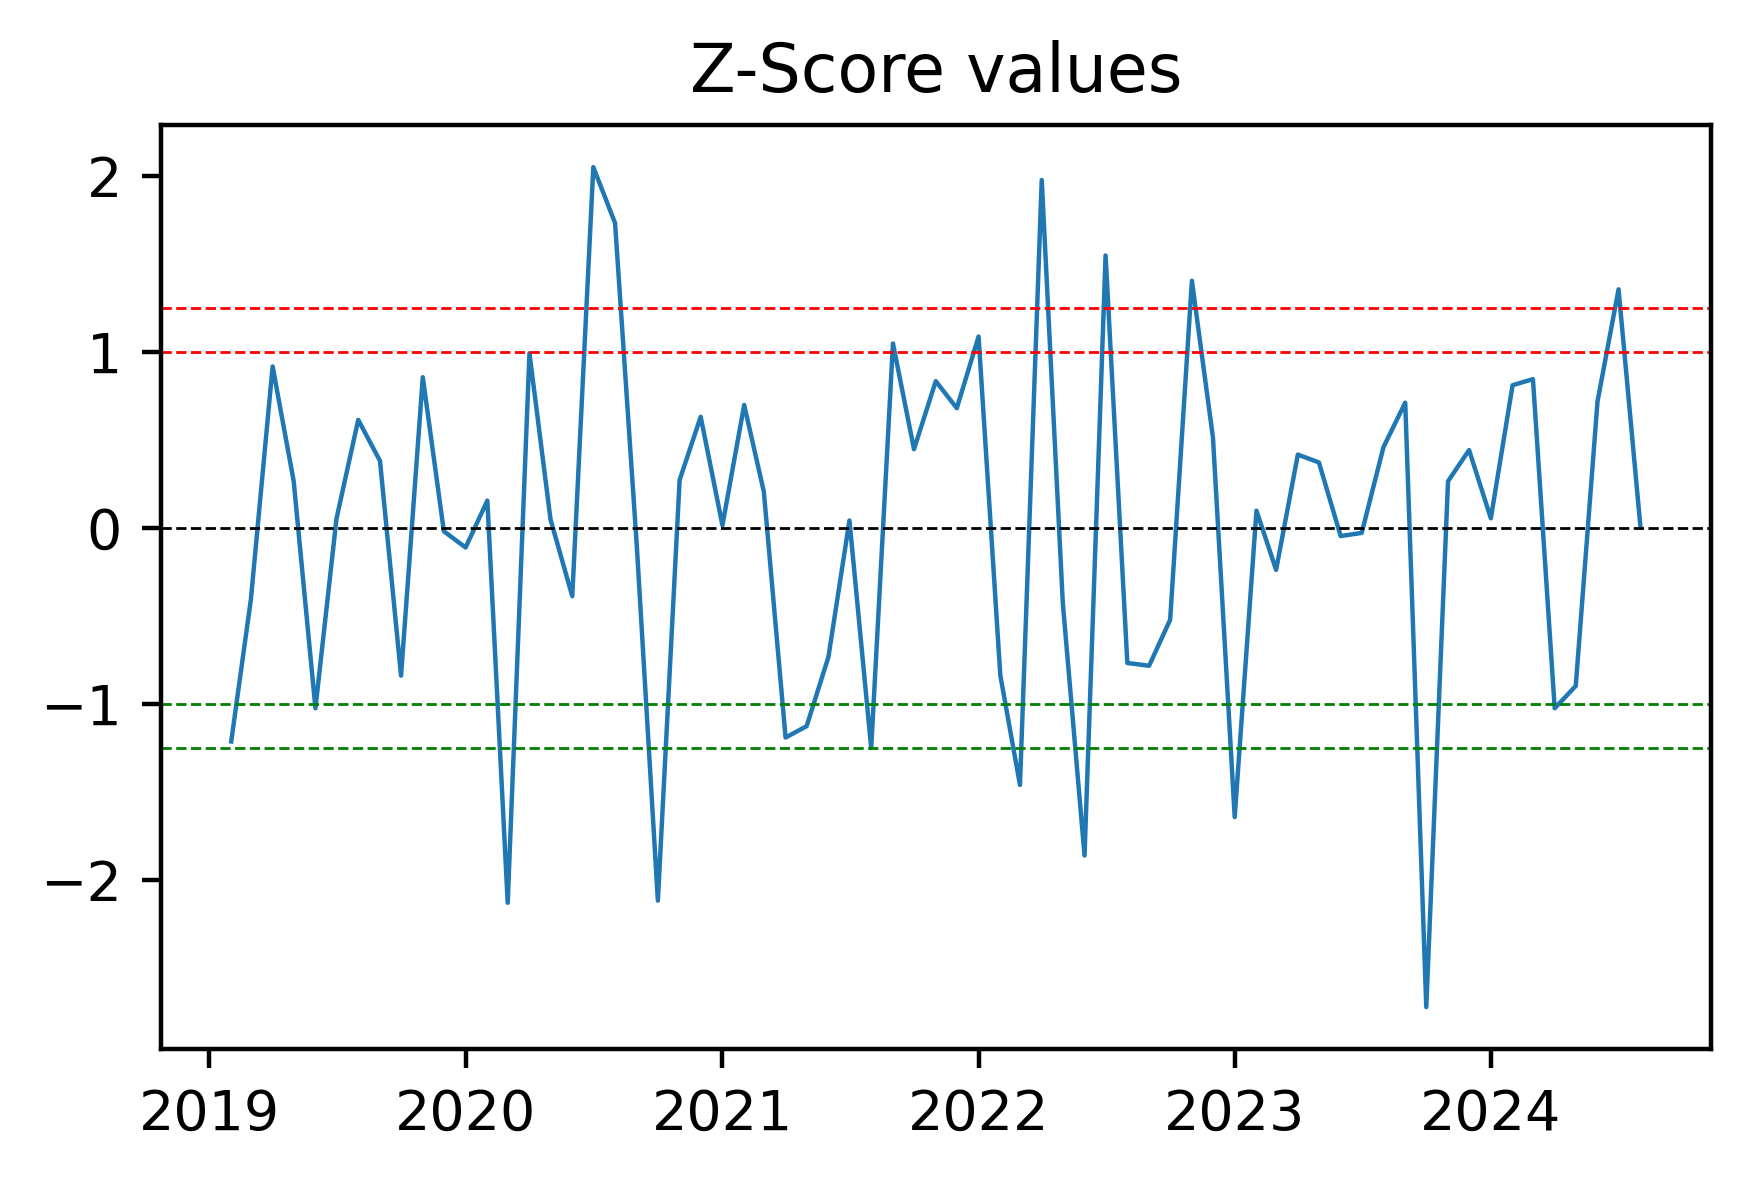

In [84]:
z_scores = (spread - spread.mean())/spread.std()

plt.figure(figsize=(5,3),dpi=400)
plt.plot(z_scores,lw=0.8)
plt.title("Z-Score values")
plt.axhline(z_scores.mean(),color='black',linestyle="dashed",lw=0.5)
plt.axhline(1,color='red',linestyle="dashed",lw=0.5)
plt.axhline(1.25,color='red',linestyle="dashed",lw=0.5)
plt.axhline(-1,color='green',linestyle="dashed",lw=0.5)
plt.axhline(-1.25,color='green',linestyle="dashed",lw=0.5)

<Axes: xlabel='Date'>

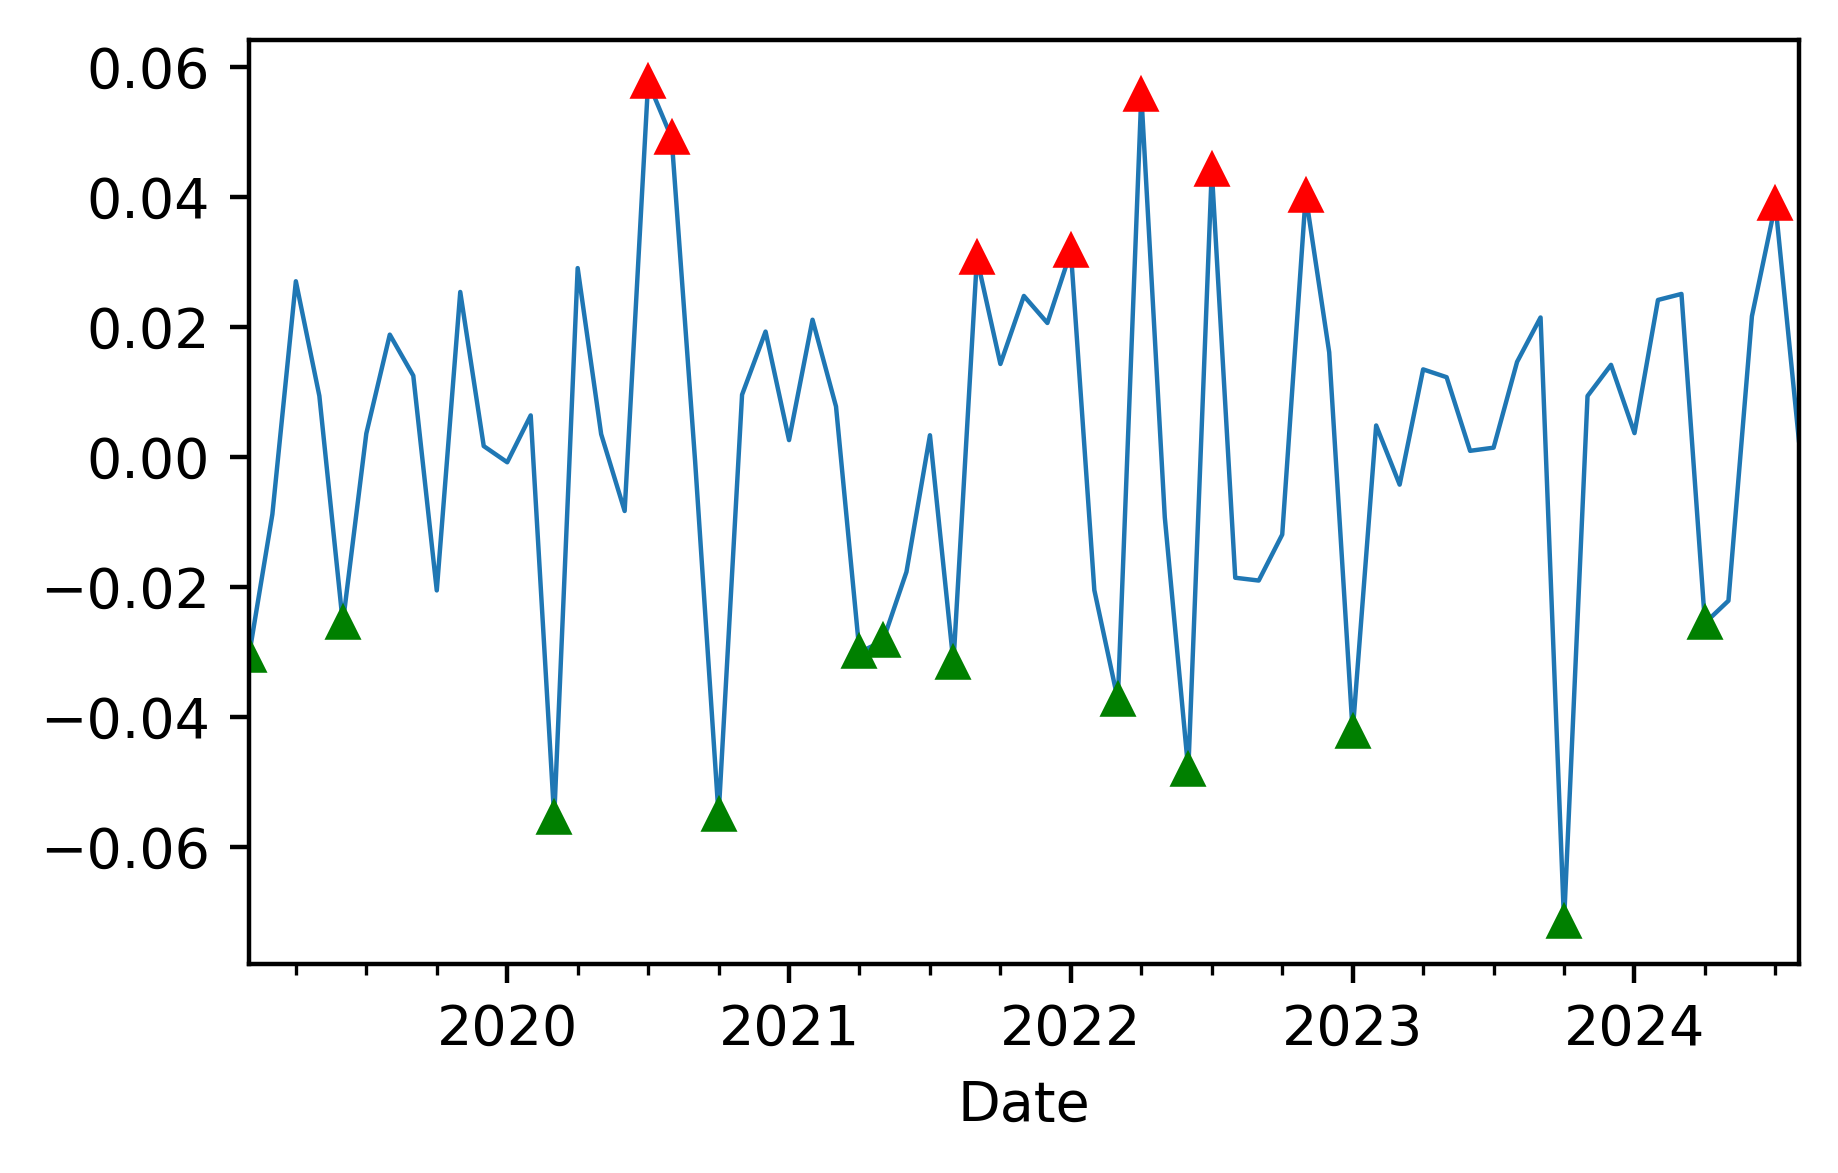

In [85]:
buy = spread.copy()
sell = spread.copy()

buy[z_scores>-1] = 0
sell[z_scores<1] = 0

buy = buy[buy != 0]
sell = sell[sell != 0]

plt.figure(figsize=(5,3),dpi=400)
spread.plot(lw=0.8)
buy.plot(color='g',linestyle='None',marker='^',markersize=5)
sell.plot(color='r',linestyle='None',marker='^',markersize=5)

Text(0.5, 1.0, 'MA')

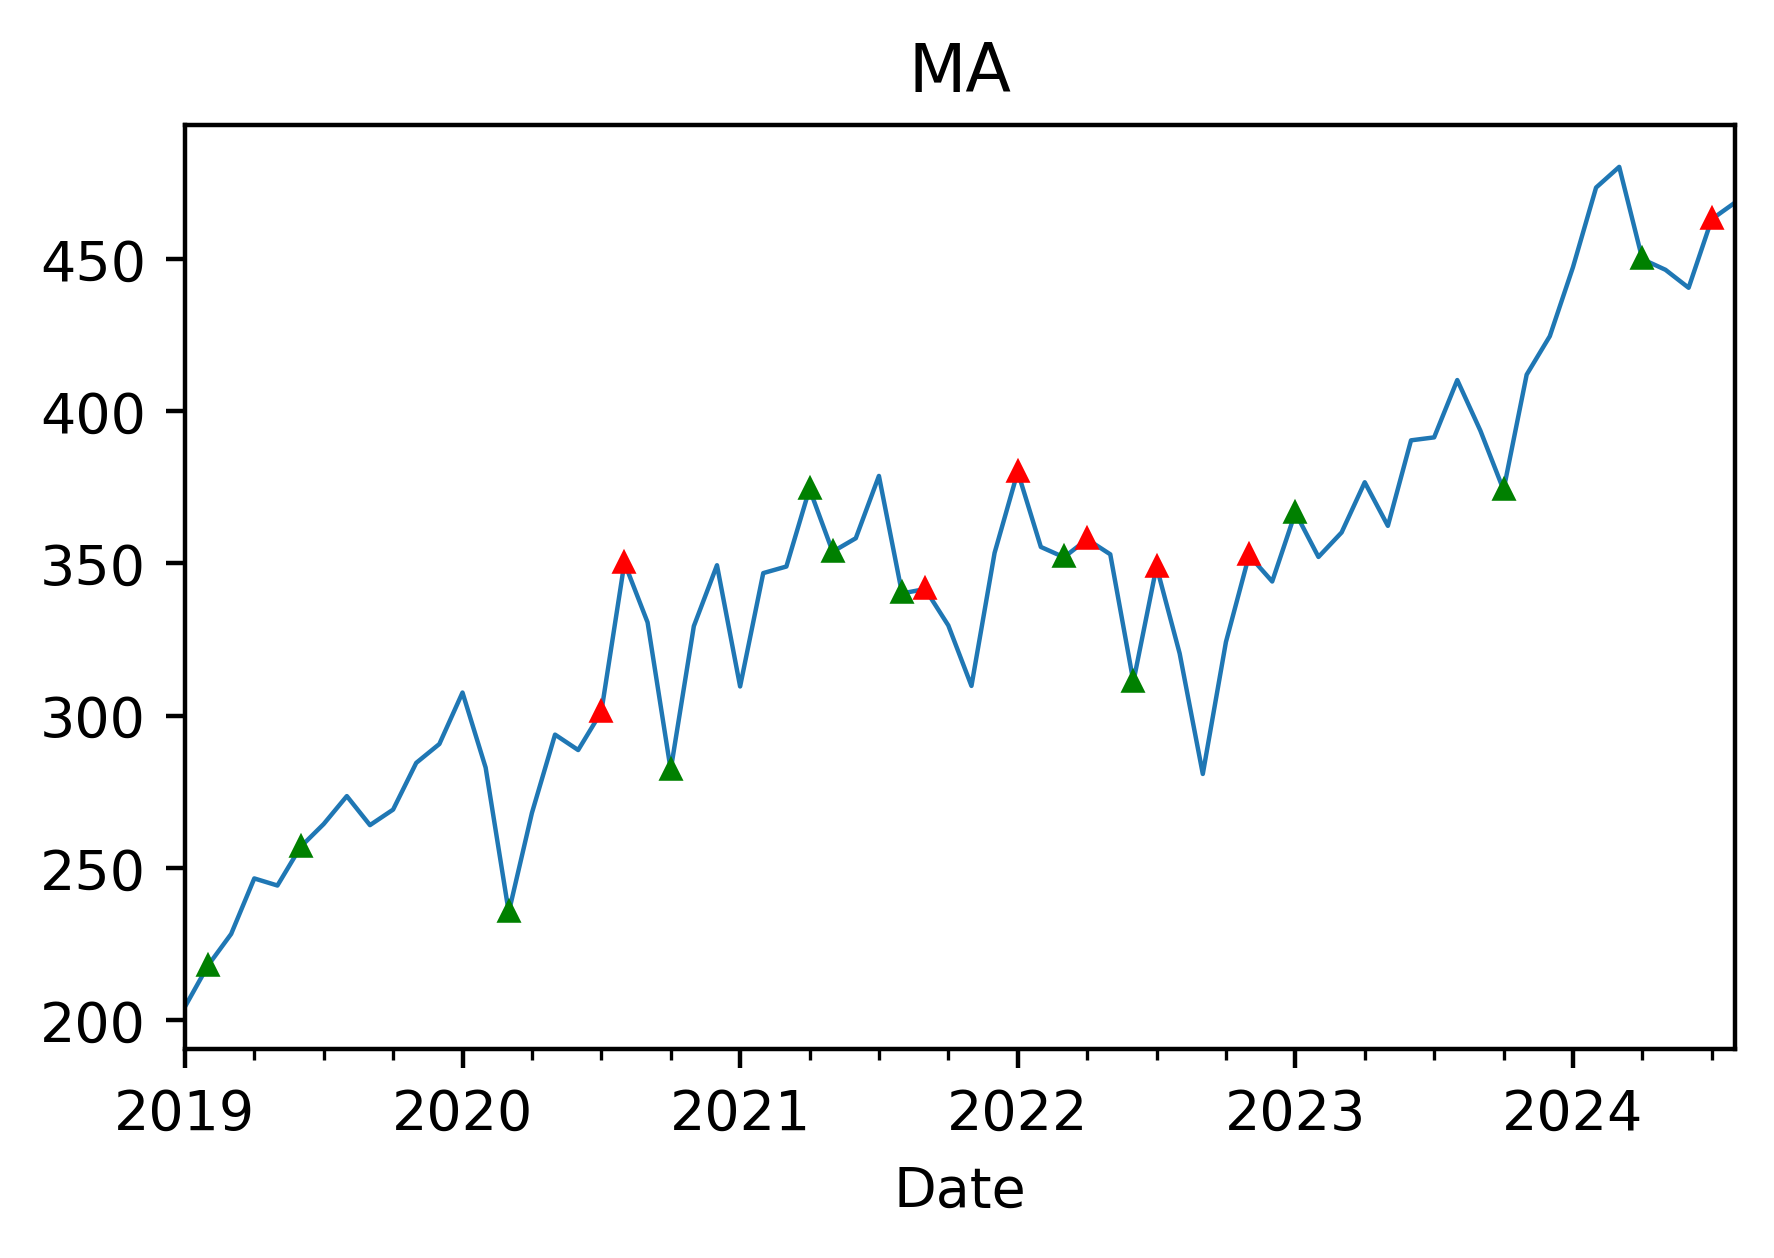

In [86]:
buy_dates = pd.Series(buy.index)
sell_dates = pd.Series(sell.index)

filtered_return_buy = dataset[dataset.index.isin(buy_dates)]
filtered_return_sell = dataset[dataset.index.isin(sell_dates)]

# Stock 1
plt.figure(figsize=(5,3),dpi=400)
dataset[Stock1].plot(lw=0.8)
filtered_return_buy[Stock1].plot(color='g',linestyle='None', marker='^',markersize=3)
filtered_return_sell[Stock1].plot(color='r',linestyle='None', marker='^',markersize=3)
plt.title(Stock1)


Text(0.5, 1.0, 'V')

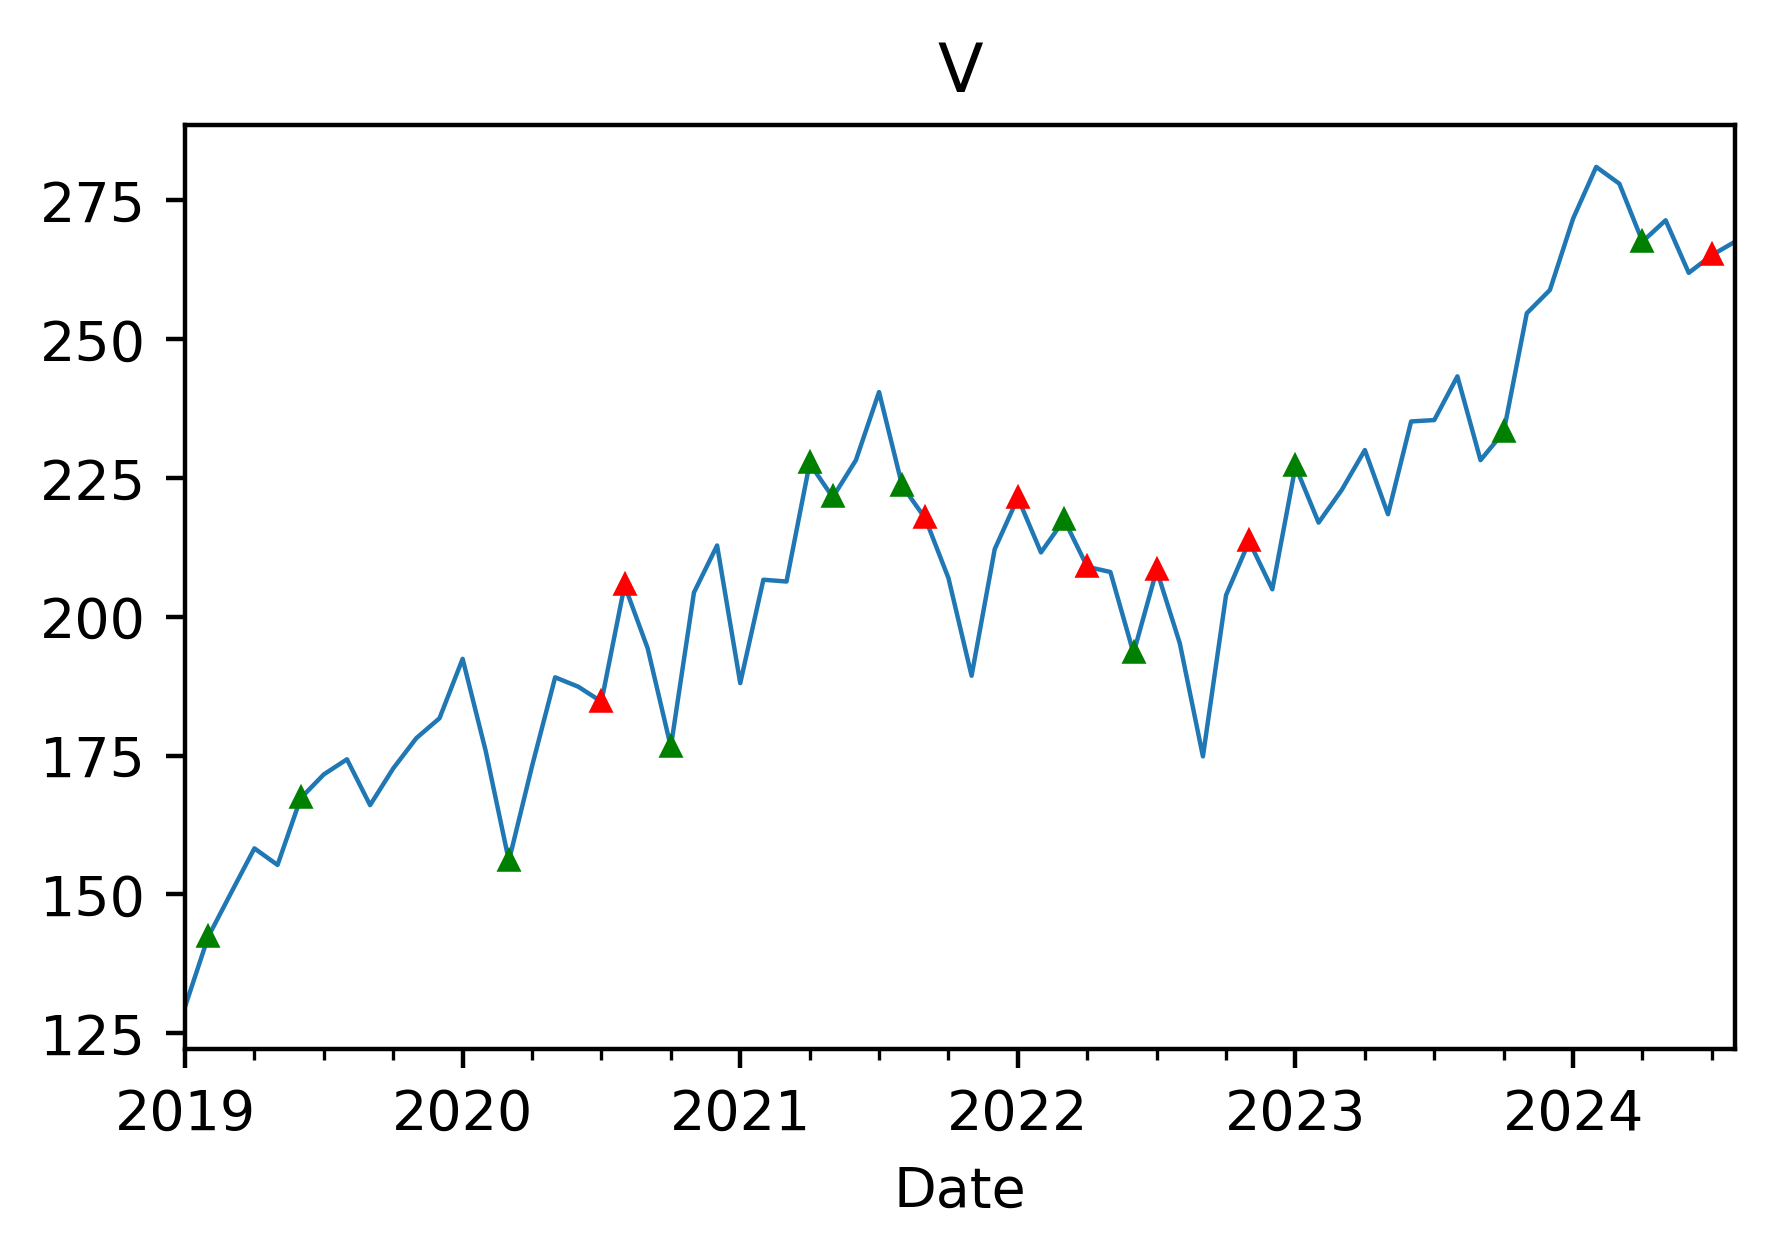

In [87]:
# Stock 2
plt.figure(figsize=(5,3),dpi=400)
dataset[Stock2].plot(lw=0.8)
filtered_return_buy[Stock2].plot(color='g',linestyle='None', marker='^',markersize=3)
filtered_return_sell[Stock2].plot(color='r',linestyle='None', marker='^',markersize=3)
plt.title(Stock2)